### Pra Pemrosesan Data

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

In [43]:
datasets = pd.read_excel('dataKasus-1.xlsx')
datasets

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE,Unnamed: 12
0,1,NAMA 1,23 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Ya,Tidak,>UMR,Non PE,NaN
1,2,NAMA 2,29 TH,2,< 2 tahun,Tidak,PEB,Tidak,Tidak,Ada,>UMR,PE,NaN
2,3,NAMA 3,20 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
3,4,NAMA 4,18 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
4,5,NAMA 5,34 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,558,NAMA 557,40 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
557,559,NAMA 558,28 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
558,560,NAMA 559,41 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
559,561,NAMA 560,32 TH,2,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN


In [44]:
datasets = datasets.drop(columns=['Unnamed: 12'])

In [45]:
datasets.columns = datasets.columns.str.strip()
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   NO                                561 non-null    int64 
 1   NAMA                              561 non-null    object
 2   USIA                              558 non-null    object
 3   PARITAS                           561 non-null    int64 
 4   JARAK KELAHIRAN                   554 non-null    object
 5   RIW HIPERTENSI                    561 non-null    object
 6   RIW PE                            561 non-null    object
 7   OBESITAS                          561 non-null    object
 8   RIW DM                            561 non-null    object
 9   RIW HIPERTENSI/PE DALAM KELUARGA  561 non-null    object
 10  SOSEK RENDAH                      561 non-null    object
 11  PE/Non PE                         561 non-null    object
dtypes: int64(2), object(10

In [46]:
print(datasets.isnull().sum())

NO                                  0
NAMA                                0
USIA                                3
PARITAS                             0
JARAK KELAHIRAN                     7
RIW HIPERTENSI                      0
RIW PE                              0
OBESITAS                            0
RIW DM                              0
RIW HIPERTENSI/PE DALAM KELUARGA    0
SOSEK RENDAH                        0
PE/Non PE                           0
dtype: int64


In [47]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = datasets['USIA'].astype(str).value_counts(dropna=False)

print(value_counts)

USIA
28 TH     28
25 TH     24
31 TH     23
29 TH     22
24 TH     21
          ..
30 th      1
23         1
37         1
39 TH      1
14 TH      1
Name: count, Length: 73, dtype: int64


In [48]:
# Mengisi nilai NaN dengan string kosong
datasets['USIA'] = datasets['USIA'].fillna('')

# Menghapus spasi ekstra dan mengambil angka
datasets['USIA'] = datasets['USIA'].str.strip().str.extract('(\d+)')[0]

# Mengonversi ke tipe data numerik
datasets['USIA'] = pd.to_numeric(datasets['USIA'], errors='coerce')

# Mengisi nilai NaN dengan rata-rata usia
datasets['USIA'] = datasets['USIA'].fillna(datasets['USIA'].mean())

In [49]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = datasets['USIA'].astype(str).value_counts(dropna=False)

print(value_counts)

USIA
31.0                  41
28.0                  41
26.0                  35
25.0                  35
22.0                  35
29.0                  34
24.0                  33
27.0                  27
23.0                  25
30.0                  25
33.0                  23
21.0                  21
32.0                  20
20.0                  20
36.0                  18
35.0                  17
38.0                  15
28.195612431444243    14
34.0                  14
41.0                  11
39.0                  11
19.0                  10
37.0                   9
40.0                   8
17.0                   5
18.0                   5
15.0                   3
16.0                   2
43.0                   2
13.0                   1
14.0                   1
Name: count, dtype: int64


In [50]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = datasets['PARITAS'].astype(str).value_counts(dropna=False)
print(value_counts)

PARITAS
1    228
2    186
3     82
0     39
4     20
5      3
6      3
Name: count, dtype: int64


In [51]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = datasets['JARAK KELAHIRAN'].astype(str).value_counts(dropna=False)

print(value_counts)

JARAK KELAHIRAN
anak pertama    260
> 2 tahun       211
< 2 tahun        81
nan               7
> 2 tahun         2
Name: count, dtype: int64


In [52]:
imputer = SimpleImputer(strategy='most_frequent')
from sklearn.preprocessing import LabelEncoder

datasets['JARAK KELAHIRAN'] = imputer.fit_transform(datasets[['JARAK KELAHIRAN']]).ravel()
# Mengganti nilai '> 2 tahun ' dengan '> 2 tahun'
datasets['JARAK KELAHIRAN'] = datasets['JARAK KELAHIRAN'].replace('> 2 tahun ', '> 2 tahun')

In [53]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = datasets['JARAK KELAHIRAN'].astype(str).value_counts(dropna=False)

print(value_counts)

JARAK KELAHIRAN
anak pertama    267
> 2 tahun       213
< 2 tahun        81
Name: count, dtype: int64


In [54]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = datasets['RIW HIPERTENSI'].astype(str).value_counts(dropna=False)

print(value_counts)

RIW HIPERTENSI
Tidak    508
Ya        53
Name: count, dtype: int64


In [55]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = datasets['RIW PE'].astype(str).value_counts(dropna=False)

print(value_counts)

RIW PE
Tidak                     526
PEB                        19
PE                          6
HELLP SYNDROM               2
Impending PE                2
Impending Eklamsia          1
Kejang Konvulsi             1
impending eklamsia          1
PE, HELLP Syndrome          1
PEB impending eklampsi      1
Impending Ekalmsia          1
Name: count, dtype: int64


In [56]:
datasets['RIW PE'] = datasets['RIW PE'].replace(
    to_replace=['PEB', 'PE', 'HELLP SYNDROM', 'Impending PE', 'Impending Eklamsia', 'PE, HELLP Syndrome', 'PEB impending eklampsi', 'Impending Ekalmsia', 'Kejang Konvulsi', 'impending eklamsia'],
    value='Ada'
)

In [57]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = datasets['RIW PE'].astype(str).value_counts(dropna=False)

print(value_counts)

RIW PE
Tidak    526
Ada       35
Name: count, dtype: int64


In [58]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = datasets['OBESITAS'].astype(str).value_counts(dropna=False)

print(value_counts)

OBESITAS
Tidak    556
Ya         5
Name: count, dtype: int64


In [59]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = datasets['RIW DM'].astype(str).value_counts(dropna=False)

print(value_counts)

RIW DM
Tidak    556
Ya         5
Name: count, dtype: int64


In [60]:
value_counts = datasets['RIW HIPERTENSI/PE DALAM KELUARGA'].astype(str).value_counts(dropna=False)

print(value_counts)

RIW HIPERTENSI/PE DALAM KELUARGA
Tidak    550
Ada       11
Name: count, dtype: int64


In [61]:
value_counts = datasets['SOSEK RENDAH'].astype(str).value_counts(dropna=False)

print(value_counts)

SOSEK RENDAH
>UMR    557
<UMR      4
Name: count, dtype: int64


In [62]:
value_counts = datasets['PE/Non PE'].astype(str).value_counts(dropna=False)

print(value_counts)

PE/Non PE
Non PE                    520
PEB                        20
PE                         17
Eklamsia                    1
PE gemelli                  1
PEB impending eklampsi      1
PE                          1
Name: count, dtype: int64


In [63]:
datasets['PE/Non PE'] = datasets['PE/Non PE'].replace(
    to_replace=['PEB', 'PE', 'Eklamsia', 'PE gemelli', 'PEB impending eklampsi', 'PE '],
    value='PE'
)

In [64]:
value_counts = datasets['PE/Non PE'].astype(str).value_counts(dropna=False)

print(value_counts)

PE/Non PE
Non PE    520
PE         41
Name: count, dtype: int64


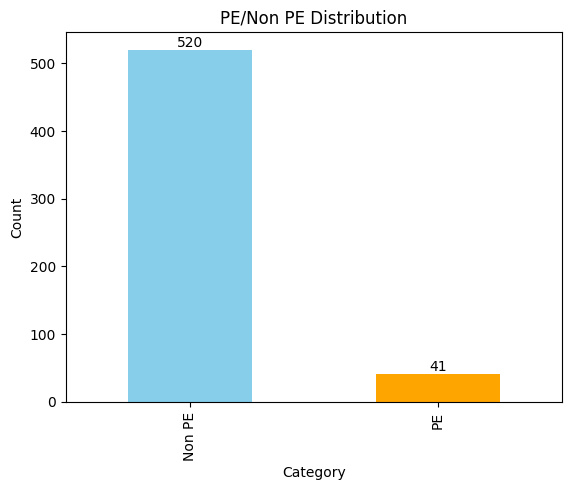

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

value_counts = datasets['PE/Non PE'].value_counts()

# Create a bar chart
ax = value_counts.plot(kind='bar', color=['skyblue', 'orange'])

# Add title and labels
plt.title('PE/Non PE Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

# Add count labels on top of each bar
for i, count in enumerate(value_counts):
    ax.text(i, count , str(count), ha='center', va='bottom')

# Display the bar chart
plt.show()

In [66]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NO                                561 non-null    int64  
 1   NAMA                              561 non-null    object 
 2   USIA                              561 non-null    float64
 3   PARITAS                           561 non-null    int64  
 4   JARAK KELAHIRAN                   561 non-null    object 
 5   RIW HIPERTENSI                    561 non-null    object 
 6   RIW PE                            561 non-null    object 
 7   OBESITAS                          561 non-null    object 
 8   RIW DM                            561 non-null    object 
 9   RIW HIPERTENSI/PE DALAM KELUARGA  561 non-null    object 
 10  SOSEK RENDAH                      561 non-null    object 
 11  PE/Non PE                         561 non-null    object 
dtypes: float

## Konversi Nilai ke Numerik

In [67]:
# label_encoder = LabelEncoder()
# datasets['PARITAS'] = label_encoder.fit_transform(datasets['PARITAS'])

In [68]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = datasets['PARITAS'].astype(str).value_counts(dropna=False)

print(value_counts)

PARITAS
1    228
2    186
3     82
0     39
4     20
5      3
6      3
Name: count, dtype: int64


In [69]:
label_encoder = LabelEncoder()
datasets['JARAK KELAHIRAN'] = label_encoder.fit_transform(datasets['JARAK KELAHIRAN'])

In [70]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = datasets['JARAK KELAHIRAN'].astype(str).value_counts(dropna=False)

print(value_counts)

JARAK KELAHIRAN
2    267
1    213
0     81
Name: count, dtype: int64


In [71]:
from sklearn.preprocessing import OneHotEncoder

In [72]:
# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
one_hot_encoded = encoder.fit_transform(datasets[['RIW HIPERTENSI']])

# Dapatkan nama kolom baru dari encoder
one_hot_columns = encoder.get_feature_names_out(['RIW HIPERTENSI'])

# Buat DataFrame baru dari hasil One-Hot Encoding
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
datasets = pd.concat([datasets.drop('RIW HIPERTENSI', axis=1), one_hot_df], axis=1)

In [73]:
# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
one_hot_encoded = encoder.fit_transform(datasets[['RIW PE']])

# Dapatkan nama kolom baru dari encoder
one_hot_columns = encoder.get_feature_names_out(['RIW PE'])

# Buat DataFrame baru dari hasil One-Hot Encoding
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
datasets = pd.concat([datasets.drop('RIW PE', axis=1), one_hot_df], axis=1)

In [74]:
# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
one_hot_encoded = encoder.fit_transform(datasets[['OBESITAS']])

# Dapatkan nama kolom baru dari encoder
one_hot_columns = encoder.get_feature_names_out(['OBESITAS'])

# Buat DataFrame baru dari hasil One-Hot Encoding
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
datasets = pd.concat([datasets.drop('OBESITAS', axis=1), one_hot_df], axis=1)

In [75]:
# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
one_hot_encoded = encoder.fit_transform(datasets[['RIW DM']])

# Dapatkan nama kolom baru dari encoder
one_hot_columns = encoder.get_feature_names_out(['RIW DM'])

# Buat DataFrame baru dari hasil One-Hot Encoding
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
datasets = pd.concat([datasets.drop('RIW DM', axis=1), one_hot_df], axis=1)

In [76]:
# datasets['RIW HIPERTENSI/PE DALAM KELUARGA'] = label_encoder.fit_transform(datasets['RIW HIPERTENSI/PE DALAM KELUARGA'])

# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
one_hot_encoded = encoder.fit_transform(datasets[['RIW HIPERTENSI/PE DALAM KELUARGA']])

# Dapatkan nama kolom baru dari encoder
one_hot_columns = encoder.get_feature_names_out(['RIW HIPERTENSI/PE DALAM KELUARGA'])

# Buat DataFrame baru dari hasil One-Hot Encoding
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
datasets = pd.concat([datasets.drop('RIW HIPERTENSI/PE DALAM KELUARGA', axis=1), one_hot_df], axis=1)

In [77]:
# datasets['SOSEK RENDAH'] = label_encoder.fit_transform(datasets['SOSEK RENDAH'])

# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
one_hot_encoded = encoder.fit_transform(datasets[['SOSEK RENDAH']])

# Dapatkan nama kolom baru dari encoder
one_hot_columns = encoder.get_feature_names_out(['SOSEK RENDAH'])

# Buat DataFrame baru dari hasil One-Hot Encoding
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
datasets = pd.concat([datasets.drop('SOSEK RENDAH', axis=1), one_hot_df], axis=1)

In [78]:
datasets['PE/Non PE'] = label_encoder.fit_transform(datasets['PE/Non PE'])

In [79]:
value_counts = datasets['PE/Non PE'].astype(str).value_counts(dropna=False)

print(value_counts)

PE/Non PE
0    520
1     41
Name: count, dtype: int64


In [80]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NO                                      561 non-null    int64  
 1   NAMA                                    561 non-null    object 
 2   USIA                                    561 non-null    float64
 3   PARITAS                                 561 non-null    int64  
 4   JARAK KELAHIRAN                         561 non-null    int64  
 5   PE/Non PE                               561 non-null    int64  
 6   RIW HIPERTENSI_Tidak                    561 non-null    float64
 7   RIW HIPERTENSI_Ya                       561 non-null    float64
 8   RIW PE_Ada                              561 non-null    float64
 9   RIW PE_Tidak                            561 non-null    float64
 10  OBESITAS_Tidak                          561 non-null    float6

In [81]:
datasets

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,PE/Non PE,RIW HIPERTENSI_Tidak,RIW HIPERTENSI_Ya,RIW PE_Ada,RIW PE_Tidak,OBESITAS_Tidak,OBESITAS_Ya,RIW DM_Tidak,RIW DM_Ya,RIW HIPERTENSI/PE DALAM KELUARGA_Ada,RIW HIPERTENSI/PE DALAM KELUARGA_Tidak,SOSEK RENDAH_<UMR,SOSEK RENDAH_>UMR
0,1,NAMA 1,23.0,3,0,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,2,NAMA 2,29.0,2,0,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,3,NAMA 3,20.0,1,2,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,4,NAMA 4,18.0,1,2,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,5,NAMA 5,34.0,3,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,558,NAMA 557,40.0,3,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
557,559,NAMA 558,28.0,3,0,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
558,560,NAMA 559,41.0,3,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
559,561,NAMA 560,32.0,2,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [82]:
datasets.to_csv('datasets-jadi.csv', index=False)